<a href="https://colab.research.google.com/github/EngThiagoFerrari/dimensionality_reduction/blob/main/Dimensionality_Reduction_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images Dimensionality Reduction for Neural Network

This project is part of the bootcamp Machine Learning Practitioner, offered by BairesDev through the DIO.me web platform.  
The obejctive of this study is to implement an Image Dimensionality reduction in python by tranforming a colored image to grayscale and a black and white images.
Throught the tests I ran developing it, I could observe a significant reduction in the image size -- around 22 to 35%, mainly when evaluating the grayscale image. The black and white image (binary) results were not that consistent -- some of them showed lesser reduction and even increase in sizes for some of the samples.  
Note: According to a quick research about this issue, I learned that it may happen sometimes depending exclusively on the image, but I still have to delve deeper into this subject.  
To learn more about this project please refer to the README.md file.

## Importing the libraries

In [76]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

## Getting the images from internet

I left here two file examples to showcase the black and white isses I described above:
- the first one results in size increase of around 23%
- the second file results in a reduction of 33%, though its grayscale version registers a reduction of 35%


In [77]:
#!wget -O original_img.jpg https://www.planetware.com/wpimages/2022/04/california-los-angeles-top-rated-attractions-santa-monica1.jpg

# iron man Mark1
!wget -O original_img.jpg https://popcollectibles.store/cdn/shop/products/327542429_547965967269885_5154070003883115842_n_1024x1024.jpg?v=1675541002

--2025-01-23 01:36:55--  https://popcollectibles.store/cdn/shop/products/327542429_547965967269885_5154070003883115842_n_1024x1024.jpg?v=1675541002
Resolving popcollectibles.store (popcollectibles.store)... 23.227.38.65
Connecting to popcollectibles.store (popcollectibles.store)|23.227.38.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227121 (222K) [image/jpeg]
Saving to: ‘original_img.jpg’

original_img.jpg    100%[===================>] 221.80K  --.-KB/s    in 0.03s   

2025-01-23 01:36:55 (6.59 MB/s) - ‘original_img.jpg’ saved [227121/227121]



## Saving the original image and acquiring its data

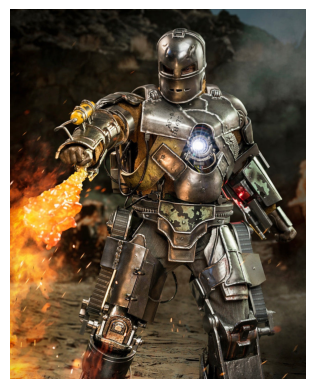

Width: 819px, Height: 1024px, Channels: 3
Image size: 227121 bytes


In [78]:
img_file = "original_img.jpg"
original_image = mpimg.imread(img_file)

# Getting original image dimensions
height, width, channels = original_image.shape

# Getting original image size
original_image_size = os.path.getsize(img_file)

fig, ax = plt.subplots(1, 1)
ax.imshow(original_image)
ax.axis('off')

plt.show()
print(f"Width: {width}px, Height: {height}px, Channels: {channels}")
print(f"Image size: {original_image_size} bytes")

## Function to tranform the colored image into grayscale.

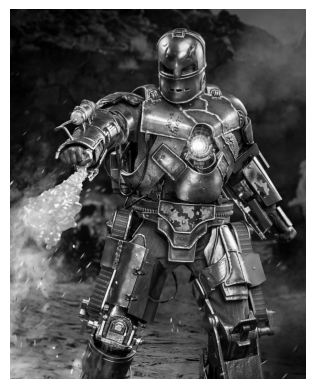

Width: 819px, Height: 1024px, Channels: 3
Image size: 146090 bytes
Percentual difference in the image size: -35.68 %


In [79]:
# Function to convert the image to grayscale
def rgb_to_gray(image):
  return 0.299*image[:, :, 0] + 0.587*image[:, :, 1] + 0.114*image[:, :, 2]


gray_image = rgb_to_gray(original_image)

fig, ax = plt.subplots()
ax.imshow(gray_image, cmap="gray")
ax.axis("off")
plt.show()

mpimg.imsave("grayscale_img.jpg", gray_image, cmap='gray')

# Reading the grayscale image
gray_img_path = "grayscale_img.jpg"
gray_img = mpimg.imread(gray_img_path)

# Getting the grayscale image data
# Dimensions
g_height, g_width, g_channels = gray_img.shape
print(f"Width: {g_width}px, Height: {g_height}px, Channels: {g_channels}")

# getting the graysacle image size
gray_img_size = os.path.getsize(gray_img_path)
gray_diff = ((gray_img_size - original_image_size)/original_image_size)*100
print(f"Image size: {gray_img_size} bytes")
print(f"Percentual difference in the image size: {((gray_img_size - original_image_size)/original_image_size)*100:.2f} %")


## Converting the Grayscale image to Black and white

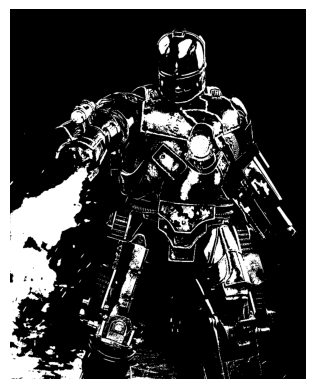

Width: 819px, Height: 1024px, Channels: 3
Image size: 151237 bytes
Percentual difference in the image size: -33.41 %


In [82]:
# Converting the image to black and white - binary image
threshold = 128 #128 / 255 #Normalize the threshold for comparison
bnw_image = np.where(gray_image >= threshold, 1.0, 0.0)

fig, ax = plt.subplots()
ax.imshow(bnw_image, cmap='gray')
ax.axis("off")
plt.show()

mpimg.imsave("black&white_img.jpg", bnw_image, cmap='gray')

# Reading the black and white image
bnw_img_path = "black&white_img.jpg"
bnw_img = mpimg.imread(bnw_img_path)

# Getting the grayscale image data
# Dimensions
bnw_height, bnw_width, bnw_channels = bnw_img.shape
print(f"Width: {bnw_width}px, Height: {bnw_height}px, Channels: {bnw_channels}")

# getting the graysacle image size
bnw_img_size = os.path.getsize(bnw_img_path)
bnw_diff = ((bnw_img_size - original_image_size)/original_image_size)*100
print(f"Image size: {bnw_img_size} bytes")
print(f"Percentual difference in the image size: {((bnw_img_size - original_image_size)/original_image_size)*100:.2f} %")

## Plotting the images and comparing their data

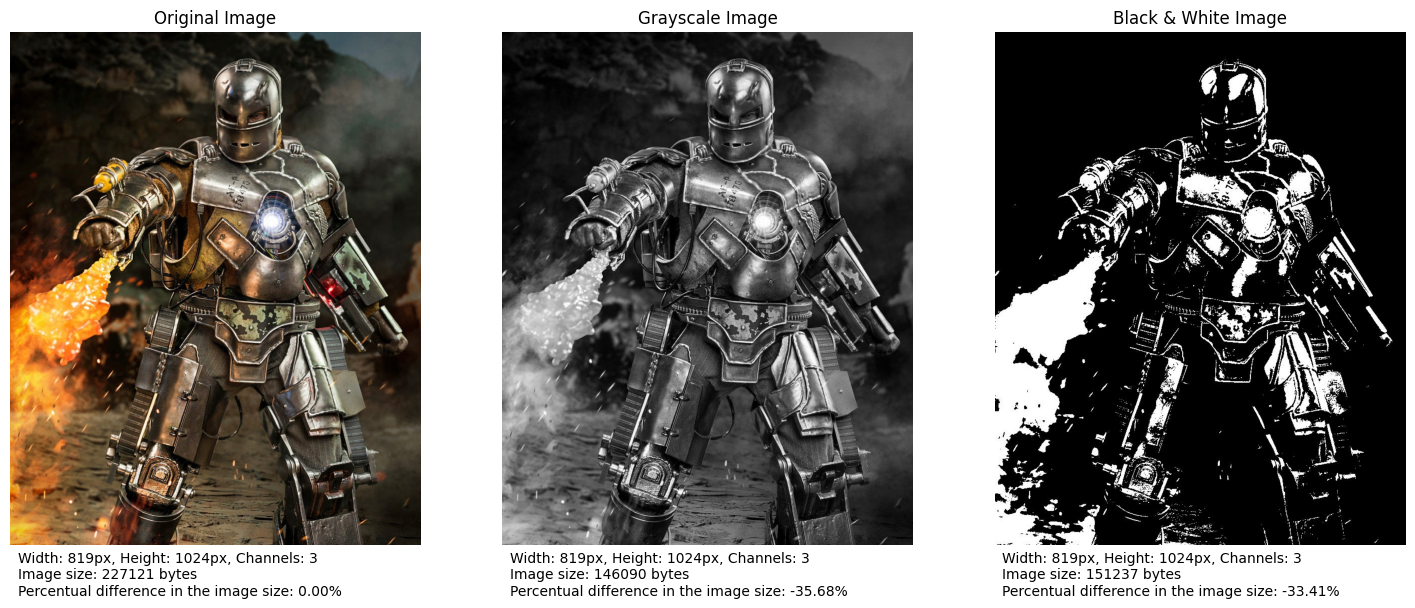

In [83]:
# Comparing the images side by side
img_ratio = width / height
img_height = 18

# Image data summary
images_data = [{"width": width, "height": height, "channels": channels, "img_size": original_image_size, "percent_diff": "0"},
               {"width": g_width, "height": g_height, "channels": g_channels, "img_size": gray_img_size, "percent_diff": gray_diff},
               {"width": bnw_width, "height": bnw_height, "channels": bnw_channels, "img_size": bnw_img_size, "percent_diff": bnw_diff}]

fig, ax = plt.subplots(1, 3, figsize=(img_height, img_height*img_ratio))
ax[0].imshow(original_image)
ax[0].set_title('Original Image')
#ax[0].text(25,height+30, "colored image")
ax[1].imshow(gray_img)
ax[1].set_title('Grayscale Image')
ax[2].imshow(bnw_img)
ax[2].set_title('Black & White Image')

for i, a in enumerate(ax):
  a.axis('off')
  a.text(15, height+100, f"Width: {images_data[i]['width']}px, Height: {images_data[i]['height']}px, Channels: {images_data[i]['channels']}\nImage size: {images_data[i]['img_size']} bytes\nPercentual difference in the image size: {float(images_data[i]['percent_diff']):.2f}%")

plt.show()